In [4]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [12]:
#read csv
df_main = pd.read_csv('clean_df_main.csv')
df_main = df_main.drop(columns=['Timestamp'])
df_main.head()


# Separate majority and minority classes
df_male = df_main[df_main.Gender == 'male']
df_female = df_main[df_main.Gender == 'female']

# Check if the DataFrames are not empty
if not df_male.empty and not df_female.empty:
    # Undersample majority class
    df_male_downsampled = resample(df_male,
                                   replace=False,  # sample without replacement
                                   n_samples=len(df_female),  # match minority class
                                   random_state=42)  # reproducible results

    # Combine minority class with downsampled majority class
    df_downsampled = pd.concat([df_female, df_male_downsampled])

    # Display new class counts
    print("Original DataFrame:")
    print(df_main['Gender'].value_counts())

    print("\nDownsampled DataFrame:")
    print(df_downsampled['Gender'].value_counts())

    print("\nDownsampled DataFrame Details:")
    print(df_downsampled)
else:
    print("One of the DataFrames is empty. Please check the data and try again.")

if df_male.empty:
    print("The DataFrame for males is empty.")
if df_female.empty:
    print("The DataFrame for females is empty.")
# Proceed only if both DataFrames are not empty
if not df_male.empty and not df_female.empty:
    # Undersample majority class
    df_male_downsampled = resample(df_male,
                                   replace=False,  # sample without replacement
                                   n_samples=len(df_female),  # match minority class
                                   random_state=42)  # reproducible results

    # Combine minority class with downsampled majority class
    df_downsampled = pd.concat([df_female, df_male_downsampled])

    # Display new class counts
    print("Original DataFrame:")
    print(df_main['Gender'].value_counts())

    print("\nDownsampled DataFrame:")
    print(df_downsampled['Gender'].value_counts())

    print("\nDownsampled DataFrame Details:")
    print(df_downsampled)
else:
    print("One of the DataFrames is empty. Please check the data and try again.")
    
    # Example collection of DataFrames
df_list = [df_male, df_female]
df_names = ['df_male', 'df_female']

# Check for empty DataFrames
for df, name in zip(df_list, df_names):
    if df.empty:
        print(f"The DataFrame {name} is empty.")

One of the DataFrames is empty. Please check the data and try again.
The DataFrame for males is empty.
The DataFrame for females is empty.
One of the DataFrames is empty. Please check the data and try again.
The DataFrame df_male is empty.
The DataFrame df_female is empty.


In [6]:
df_main.head()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,Female,United States,Corporate,No,1,Yes,1-14 days,1,-1,Yes,0,-1,1,1,Maybe,Yes
1,Female,United States,Corporate,No,1,Yes,1-14 days,1,-1,Yes,0,-1,1,1,No,Yes
2,Female,Poland,Corporate,No,-1,Yes,1-14 days,1,-1,Yes,0,-1,1,1,Maybe,Not sure
3,Female,Australia,Corporate,No,1,Yes,1-14 days,1,-1,Yes,0,-1,1,1,No,Not sure
4,Female,United States,Corporate,No,-1,No,1-14 days,1,-1,Yes,0,-1,1,1,No,No


In [7]:
#value counts names in column Days_Indoors
df_main['Days_Indoors'].value_counts()

frequency_distribution = df_main['Days_Indoors'].value_counts().reset_index()
frequency_distribution.columns = ['Days_Indoors', 'family_history']

print(frequency_distribution)


         Days_Indoors  family_history
0           1-14 days           62429
1          31-60 days           59625
2    Go out Every day           57323
3  More than 2 months           54918
4          15-30 days           52867


In [8]:
# Specify the columns you want to include in the correlation matrix
columns_of_interest = ['Coping_Struggles', 'Work_Interest', 'family_history', 'Growing_Stress']

# Create a correlation matrix with the specified columns
correlation_matrix = df_main[columns_of_interest].corr()


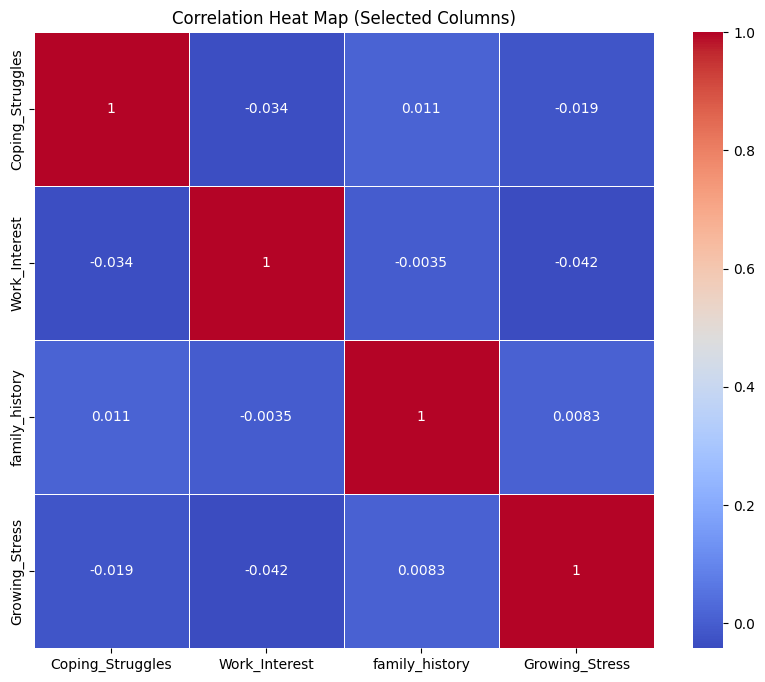

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heat Map (Selected Columns)')
plt.show()